## 理解数据 

在着手写代码处理数据之前，我们需要理解数据。包括理解建模的目标以及每个变量的含义。

### 文件说明

- **train.csv** - 训练集，用来训练模型和验证模型
- **test.csv** - 测试集，建模的目的就是预测这份数据中样本的价格
- **data_description.txt** - 每个字段及值的详细描述
- **sample_submission.csv** - 提交结果的模版

### 数据字段

- **SalePrice** 房价。这是待预测的目标变量。
- **MSSubClass**：建筑类型
- **MSZoning**：房子所在区域的一般分类
- **LotFrontage**：临街面的长度（费解）
- **LotArea**：占地面积（平方英尺）
- **Street**：临近街道的类型
- **Alley**：临近胡同（巷子）的类型
- **LotShape**：房子的外形（规则程度）
- **LandContour**：房子的平坦度
- **Utilities**：基础设施类型（水、电、气、化粪池）
- **LotConfig**：位置格局（很难与中国意思对应）
- **LandSlope**：房子的倾斜度
- **Neighborhood**：埃姆斯城市范围内的物理位置
- **Condition1**：靠近主要公路或铁路
- **Condition2**：靠近主要道路或铁路（如果存在第二条道路）
- **BldgType**：住宅的类型（单身公寓、联排、联排别墅之类）
- **HouseStyle**：住宅的风格
- **OverallQual**：整体材料和完成度评级
- **OverallCond**：整体状况评级
- **YearBuilt**：建造日期
- **YearRemodAdd**：改造日期
- **RoofStyle**：屋顶的类型
- **RoofMatl**：屋顶材料
- **Exterior1st**：房屋外部覆盖物
- **Exterior2nd**：房屋外部覆盖物（如果不止一种材料）
- **MasVnrType**：瓦片类型
- **MasVnrArea**：瓦片覆盖的面积
- **ExterQual**：外部材料质量
- **ExterCond**：外部材料的现状
- **Foundation**：墙角的类型
- **BsmtQual**：地下室的高度
- **BsmtCond**：地下室的一般评级
- **BsmtExposure**：地下室透光评级
- **BsmtFinType1**：地下室完工区域的质量
- **BsmtFinSF1**：类型1完成面积
- **BsmtFinType2**：地下室完工区域的质量（如果有多种类型）
- **BsmtFinSF2**：类型2完成面积
- **BsmtUnfSF**：未完成的地下室面积
- **TotalBsmtSF**：地下室总面积
- **Heating**：供热类型
- **HeatingQC**：供热质量和条件（好坏等级）
- **CentralAir**：是否有中央空调
- **Electrical**：供电系统
- **1stFlrSF**：一楼建筑面积
- **2ndFlrSF**：二楼建筑面积
- **LowQualFinSF**：低质量完成面积（所有地板）
- **GrLivArea**：高于（地面）居住面积（不含墙体所占面积的意思）
- **BsmtFullBath**：地下室完整的浴室个数
- **BsmtHalfBath**：地下室半浴室个数
- **FullBath**：不含地下室的浴室个数
- **HalfBath**：不含地下室的半浴室个数
- **Bedroom**：地下室以上的卧室数量
- **Kitchen**：厨房数量
- **KitchenQual**：厨房质量
- **TotRmsAbvGrd**：不含地下室的房间总数（不包括浴室）
- **Functional**：家庭功能评级
- **Fireplaces**：壁炉数量
- **FireplaceQu**：壁炉质量
- **GarageType**：车库位置
- **GarageYrBlt**：车库建成的年份
- **GarageFinish**：车库的内部完成度
- **GarageCars**：车库能容纳的汽车数量
- **GarageArea**：车库的面积
- **GarageQual**：车库质量
- **GarageCond**：车库条件
- **PavedDrive**：铺设车道
- **WoodDeckSF**：木甲板面积
- **OpenPorchSF**：开放阳台面积 Open porch area in square feet
- **EnclosedPorch**：封闭阳台面积 Enclosed porch area in square feet
- **3SsnPorch**：三季阳台 Three season porch area in square feet
- **ScreenPorch**：屏风阳台面积 Screen porch area in square feet
- **PoolArea**：泳池面积
- **PoolQC**：泳池质量
- **Fence**：栅栏质量
- **MiscFeature**：其他杂项功能
- **MiscVal**：其他杂项功能的价值
- **MoSold**：销售的月份
- **YrSold**：销售的年份
- **SaleType**：交易方式
- **SaleCondition**：交易条件

## 数据预处理

拿到一份数据，当然不是马上就开始数据清洗的工作。需要先分析一下我们要预测的目标变量，目的是了解其分布状况。分类问题也同样要知道训练集中各类的分布频率。

In [2]:
# 导入一些能想到的要用到的包

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm    

# seaborn 可视为 matplotlib 的增强版，而不是替代版，结合使用更好

In [3]:
# 加载数据，同时加载train.csv和test.csv

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [4]:
# 查看训练集前5行

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# 查看训练集末5行

train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
# 查看测试集前5行

test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
# 查看测试集末5行

test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [8]:
# 保存数据的id
train_id = train['Id']
test_id = test['Id']

# 在源数据集上删除 Id
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

# 查看删除Id之后，数据的维度。
print('The train set size is : {}'.format(train.shape))
print('The test set size is : {}'.format(test.shape))

The train set size is : (1460, 80)
The test set size is : (1459, 79)


**数据预览**

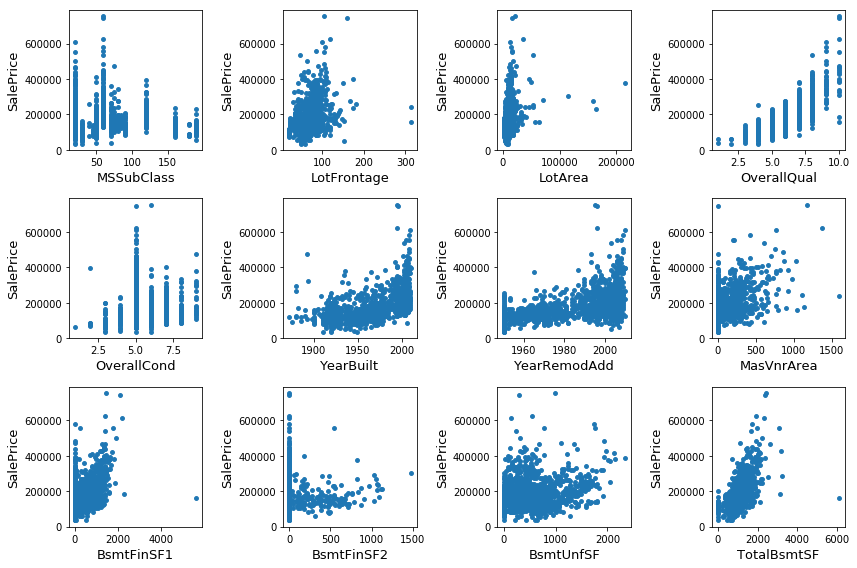

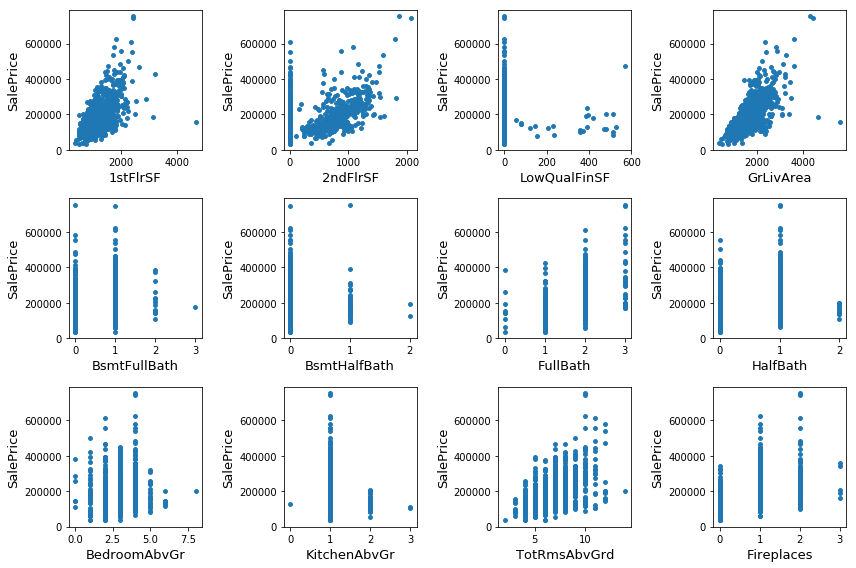

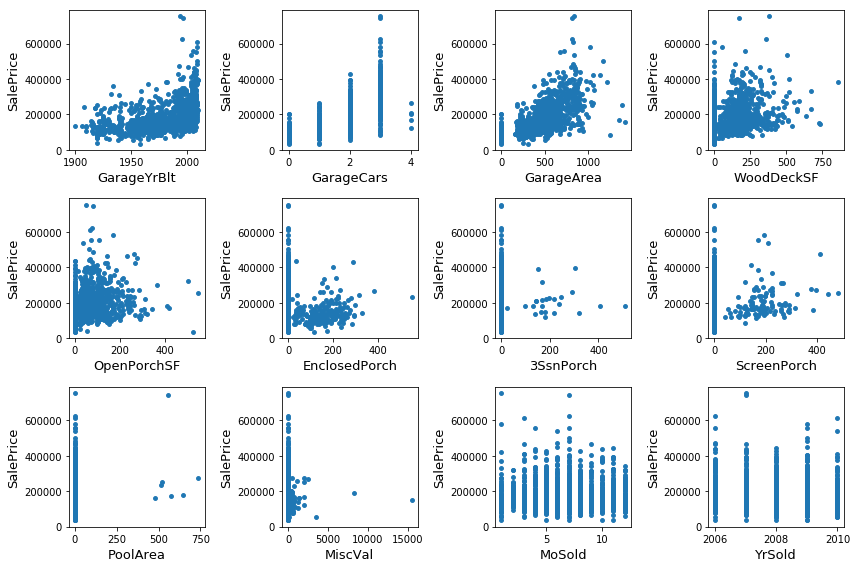

In [9]:
# 预览数值型数据

numeric = [x for x in train.columns if train[x].dtypes != 'O']

# 画散点图，使用3个画布，每个画布上画12个子图。也可以只用一个画布，注意调整大小间距即可。  

fig1 = plt.figure(figsize=(12, 8))        # figsize 参数逐步调整到满意为止
fig2 = plt.figure(figsize=(12, 8))
fig3 = plt.figure(figsize=(12, 8))
for i, fea in enumerate(numeric[ : -1]):
    if i < 12:
        x = fig1.add_subplot(3, 4, i + 1)
        x.scatter(x=train[fea], y=train['SalePrice'], s=15)    # s 调整点的大小
        x.set_ylabel('SalePrice', fontsize=13)
        x.set_xlabel(fea, fontsize=13)
    elif i < 24:
        x = fig2.add_subplot(3, 4, i - 11)
        x.scatter(x=train[fea], y=train['SalePrice'], s=15)
        x.set_ylabel('SalePrice', fontsize=13)
        x.set_xlabel(fea, fontsize=13)
    else:
        x = fig3.add_subplot(3, 4, i - 23)
        x.scatter(x=train[fea], y=train['SalePrice'], s=15)
        x.set_ylabel('SalePrice', fontsize=13)
        x.set_xlabel(fea, fontsize=13)

fig1.tight_layout()
fig2.tight_layout()
fig3.tight_layout()

plt.show()

对于一些线性关系较明显的，如 'TotalBsmtSF', '1stFlrSF', 'GrLivArea' 等变量可以看到存在离群值（面积很大而售价却很低的），对于这类值可以将其从训练集中删除。

In [10]:
# 删除可确定主要变量的离群值

train.drop(train[train['TotalBsmtSF'] > 4000].index, inplace=True)
train.drop(train[train['1stFlrSF'] > 4000].index, inplace=True)
train.drop(train[train['GrLivArea'] > 4000].index, inplace=True)

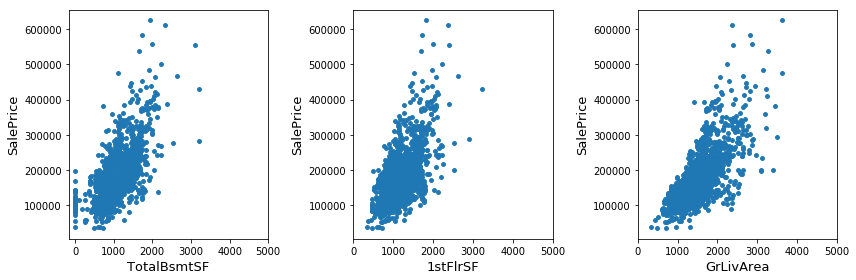

In [11]:
# 删除之后，查看这三个变量的散点情况，并对比一下之前的图。

fig = plt.figure(figsize=(12, 4))        # figsize 参数逐步调整到满意为止
for i, fea in enumerate(['TotalBsmtSF', '1stFlrSF', 'GrLivArea']):
        x = fig.add_subplot(1, 3, i + 1)
        x.scatter(x = train[fea], y=train['SalePrice'], s = 15)    # s 调整点的大小
        x.set_ylabel('SalePrice', fontsize=13)
        x.set_xticks(range(0, 5001, 1000))
        x.set_xlabel(fea, fontsize=13)
fig.tight_layout()
plt.show()

**目标变量分析**

In [12]:
# 查看目标值是否存在缺失，若目标值存在缺失需要删除样本，一般不会缺失。

print(train['SalePrice'].isnull().sum())

0


 mu = 180151.23 and sigma = 76670.25



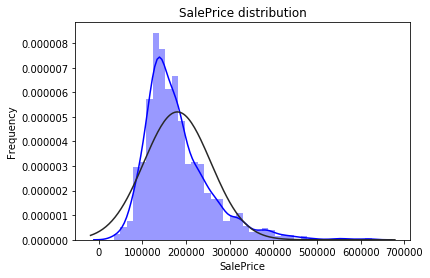

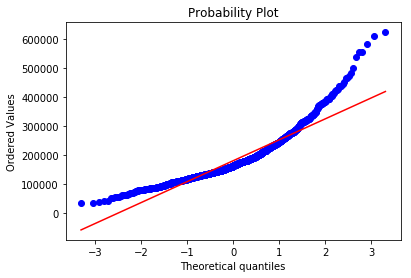

In [13]:
# 正态分布概率密度函数拟合
sns.distplot(train['SalePrice'], fit = norm, color='b')

# 求期望值和标准差
mu, sigma = norm.fit(train['SalePrice'])
print( ' mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.xticks = range(0, 800001, 200000)

# 画QQ查看数据是否服从正态分布，如果是，则QQ图会在一条直线上拟合得比较好
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

plt.show()

这两个图告诉了我们，数据集中的SalePrice的分布虽然服从正态分布，但它的偏度太大了。为了使得后期的模型更稳定，效果更好，最好是对其进行函数转换，使得它更好的服从中心对称的正太分布。

In [14]:
# 使用 numpy.log1p() 转换

train['SalePrice'] = np.log1p(train['SalePrice']) 

`np.log1p(x)` 相当于 `np.log(1 + x)`；底数为 e , 这样可以避免目标变量取 0，因为对数的x是不能为0的。 预测测试集需要反向转换回正常值。

一样的代码，查看转换之后的效果：


 mu = 12.02 and sigma = 0.40



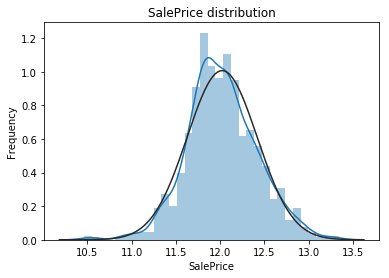

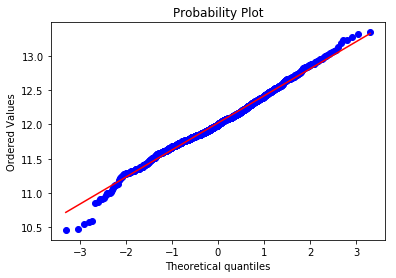

In [15]:
# 正态分布概率密度函数拟合
sns.distplot(train['SalePrice'], fit = norm)

# 求期望值和标准差
mu, sigma = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# 画QQ查看数据是否服从正态分布，如果是，则QQ图会在一条直线上拟合得比较好
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

plt.show()

现在，经过转换后的目标变量，更接近与标准的正态分布了。**在强调一遍：对于预测值，我们需要在转换回正常的价格。**

## 特征工程

分析完目标变量，对数据的变量也有了一定的了解，接下来，就要开始特征工程的工作了。

In [16]:
# 查看数据维度

print("train size is : {}".format(train.shape))
print("test size is : {}".format(test.shape))

train size is : (1456, 80)
test size is : (1459, 79)


### 缺失值

对于缺失值的统计，可以查看每列的缺失个数，但这也许不能很好的看出缺失的比例。因此，在查看缺失值的时候，建议查看缺失的比例。

In [17]:
# 查看缺失个数以及比例

def des_na(dataframe, ratio=0):
    """描述缺失值
    :params dataframe: pd.DataFrame
    :params ratio: 要查看的最低的缺失比例，默认是 0 。
    :reutrn 缺失统计DataFrame
    """
    na_count = dataframe.isnull().sum().sort_values(ascending=False)                # 计算缺失值的个数
    na_rate = na_count/dataframe.shape[0]   # 计算缺失值的比率
    dtype = dataframe.dtypes
    na_data = pd.concat([na_count,na_rate, dtype],axis=1,keys=['count','ratio', 'dtype'])           # 组合一个新的缺失值的数据框
    
    return na_data[na_data['ratio'] > ratio].sort_values('count', ascending=False)

In [18]:
# 查看训练集缺失情况

print(des_na(train, 0))         # 查看缺失比例大于 0 的变量

              count     ratio    dtype
PoolQC         1451  0.996566   object
MiscFeature    1402  0.962912   object
Alley          1365  0.937500   object
Fence          1176  0.807692   object
FireplaceQu     690  0.473901   object
LotFrontage     259  0.177885  float64
GarageFinish     81  0.055632   object
GarageQual       81  0.055632   object
GarageType       81  0.055632   object
GarageYrBlt      81  0.055632  float64
GarageCond       81  0.055632   object
BsmtFinType2     38  0.026099   object
BsmtExposure     38  0.026099   object
BsmtFinType1     37  0.025412   object
BsmtQual         37  0.025412   object
BsmtCond         37  0.025412   object
MasVnrArea        8  0.005495  float64
MasVnrType        8  0.005495   object
Electrical        1  0.000687   object


In [19]:
# 查看测试集缺失情况 

print(des_na(test, 0))                                            # 查看缺失比例大于 0 的变量

              count     ratio    dtype
PoolQC         1456  0.997944   object
MiscFeature    1408  0.965045   object
Alley          1352  0.926662   object
Fence          1169  0.801234   object
FireplaceQu     730  0.500343   object
LotFrontage     227  0.155586  float64
GarageFinish     78  0.053461   object
GarageQual       78  0.053461   object
GarageYrBlt      78  0.053461  float64
GarageCond       78  0.053461   object
GarageType       76  0.052090   object
BsmtCond         45  0.030843   object
BsmtExposure     44  0.030158   object
BsmtQual         44  0.030158   object
BsmtFinType2     42  0.028787   object
BsmtFinType1     42  0.028787   object
MasVnrType       16  0.010966   object
MasVnrArea       15  0.010281  float64
MSZoning          4  0.002742   object
Utilities         2  0.001371   object
Functional        2  0.001371   object
BsmtHalfBath      2  0.001371  float64
BsmtFullBath      2  0.001371  float64
GarageCars        1  0.000685  float64
Exterior2nd       1  0.00

发现两份数据集中缺失比例 80% 以上的字段相同，同时从数据中删除。

In [20]:
# 删除缺失比例大于 80% 的变量。这个阈值是自定义的。

del_col = des_na(train, 0.8).index

train.drop(del_col, axis=1, inplace=True)
test.drop(del_col, axis=1, inplace=True)

删除大占比的缺失变量之后，我们再运行上面的代码查看一下缺失变量的情况。

**第二步：**对缺失值进行填充，**对于缺失值的处理，尤为需要小心谨慎。**

查看 data_description.txt ，可以知道一些变量缺失的含义。

- **FireplaceQu**

    如果是 ‘NA’，说明没有壁炉，因此我们给它填充一个字符串 ‘NA’。

In [21]:
# FireplaceQu fill 'NA'

train.FireplaceQu.fillna('NA', inplace=True)
test.FireplaceQu.fillna('NA', inplace=True)

- **LotFrontage**

    训练集填充众数，测试集填充训练集的众数。

In [22]:
from sklearn.preprocessing import Imputer

fillna = Imputer(strategy='mean')

fillna.fit(train[['LotFrontage']])

train[['LotFrontage']] = fillna.transform(train[['LotFrontage']])
test[['LotFrontage']] = fillna.transform(test[['LotFrontage']])

- **GarageCond, GarageFinish, GarageQual, GarageType**

    缺失表示没有车库，因此填充‘NA’

In [23]:
for col in ['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType']:
    train[col].fillna('NA', inplace=True)
    test[col].fillna('NA', inplace=True)

- **BsmtCond, BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinType2**

    缺失表示没有地下室，因此填充‘NA’

In [24]:
for col in ['BsmtCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    train[col].fillna('NA', inplace=True)
    test[col].fillna('NA', inplace=True)

- **剩下的 float64 型的变量，经过分析均可以填充 0 。**

In [25]:
for col in train.columns:
    if train[col].dtypes == 'float64':
        train[col].fillna(0, inplace=True)
for col in test.columns:
    if test[col].dtypes == 'float64':
        test[col].fillna(0, inplace=True)

- **剩下是 object 型的变量，经过分析，都填充频数最多的值。**

In [26]:
for col in ['MasVnrType','MSZoning','Functional','Utilities','Electrical','Exterior1st','Exterior2nd','KitchenQual', 'SaleType']:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(train[col].mode()[0], inplace=True)

In [27]:
print(des_na(train, 0))
print(des_na(test, 0))

print(train.shape)
print(test.shape)

Empty DataFrame
Columns: [count, ratio, dtype]
Index: []
Empty DataFrame
Columns: [count, ratio, dtype]
Index: []
(1456, 76)
(1459, 75)


至此，缺失值的处理已经完成。

###  特征选择

特征工程是每一次建模过程中最复杂，同时也是最能体现工程师之间差距的一步。**特征决定了模型效果是上限，调参只是为了让模型更接近这个上限。**

In [28]:
# 将本身是字符含义的数值变量转换成字符变量

train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [29]:
# 找出类别型变量，是否有序，则需要查看详细数据或者查看 data_description.txt 文档

factor = [col for col in train.columns if train[col].dtypes == 'O']  # 注意这个单词 Object 的首字母，而不是数字零。
print(len(factor))
print(factor)

41
['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition']


In [30]:
# 找出数值型变量

numeric = [col for col in train.columns if train[col].dtypes != 'O']
print(len(numeric))
print(numeric)

35
['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']


**注意：包含了目标变量名**

#### 类别型特征选择

**单因素方差分析**是用于检验两组或两组以上的样本均值是否存在显著性差异的一种数理统计方法。可用来分析各个自变量对于因变量(SalePrice)是否有显著影响。这里的组指的是类别型变量的值。

In [31]:
# 单因素方差分析

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

a = '+'.join(factor)
formula = 'SalePrice~ %s' % a
# x_y = pd.concat([train, target], axis=1)
anova_results = anova_lm(ols(formula, train).fit())

anova_results.sort_values(by='PR(>F)')

D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
MSSubClass,14.0,75.317379,5.379813,241.604031,0.000000e+00
Neighborhood,24.0,58.014496,2.417271,108.558116,5.265661e-283
MSZoning,4.0,12.160875,3.040219,136.534326,1.473718e-96
ExterQual,3.0,6.658457,2.219486,99.675709,9.551470e-58
Exterior1st,14.0,5.927093,0.423364,19.013003,1.244550e-43
MasVnrType,3.0,4.253251,1.417750,63.670281,2.898424e-38
LotShape,3.0,4.007084,1.335695,59.985210,3.440747e-36
BsmtQual,4.0,3.292649,0.823162,36.967700,3.214572e-29
FireplaceQu,5.0,2.532298,0.506460,22.744786,7.018179e-22
Foundation,5.0,2.482930,0.496586,22.301371,1.886654e-21


分析结果中 P_values（PR(>F)）越小，说明该变量对目标变量的影响越大。通常我们只选择 P_values 小于 0.05 的变量。

In [32]:
# 从上面的数据中获取需要删除的变量名
del_var = list(anova_results[anova_results['PR(>F)'] > 0.05].index)

# 从 factor 中移除变量名
for each in del_var:
    factor.remove(each)

# 从数据集中移除变量
train.drop(del_var, axis=1, inplace=True)
test.drop(del_var, axis=1, inplace=True)


In [33]:
print(train.shape, test.shape)

(1456, 69) (1459, 68)


#### 数值型特征选择

对数值型的特征，自变量之间、自变量与目标变量之间的相关性，便的选择的标准之一。

通常情况下通过以下取值范围判断变量的相关强度：

相关系数绝对值 
- 0.8-1.0     极强相关
- 0.6-0.8     强相关
- 0.4-0.6     中等程度相关
- 0.2-0.4     弱相关
- 0.0-0.2     极弱相关或无相关

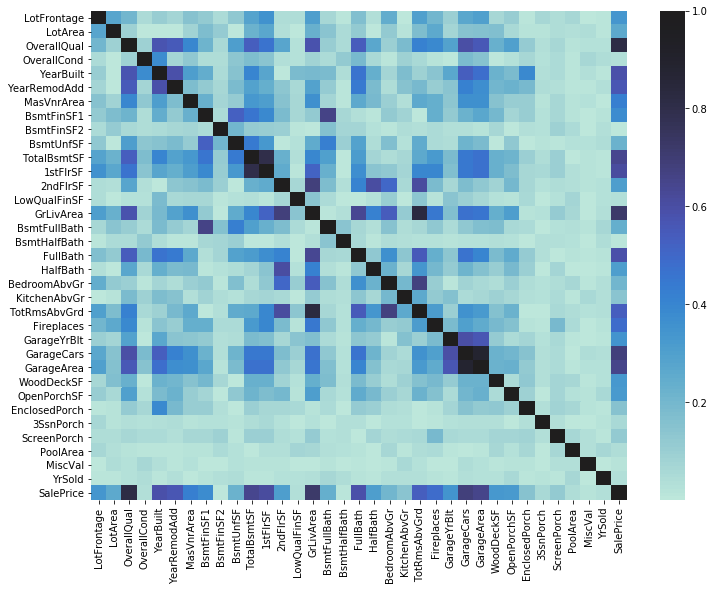

In [34]:
# 得到皮尔逊相关矩阵
corrmat = train.corr('pearson')

plt.figure(figsize=(12,9))

# 绘制热力图
sns.heatmap(np.fabs(corrmat), square=False, center=1)            # 此处取了绝对值

plt.xticks = corrmat.index
plt.yticks = corrmat.columns

plt.show()

颜色越深，相关性越强；越是需要保留的变量。除了查看各个变量与 SalePrice 的相关性，还需要查看变量之间的相关性。如果两个变量对 SalePrice 都有很强的相关性，而这两个变量之间的相关性也很强，我们选择相关性较强的那个即可。

In [40]:
train[['BsmtFinSF1']].head()

,BsmtFinSF1
0,706
1,978
2,486
3,216
4,655


In [136]:
# 保留相关系数 0.4 以上的数值型变量

# 获取待删除的数值型的变量名
del_var = corrmat[corrmat['SalePrice'] < 0.2].index

# 从 numeric 中移除变量名
for each in del_var:
    numeric.remove(each)

# 从测试集和数据集中移除变量
train.drop(del_var, axis=1, inplace=True)
test.drop(del_var, axis=1, inplace=True)

In [137]:
print(train.shape, test.shape)

(1456, 58) (1459, 57)


In [138]:
print(len(factor), len(numeric))

34 24


可以看到只有14个数值型变量了，再查看一次相关性热力图。

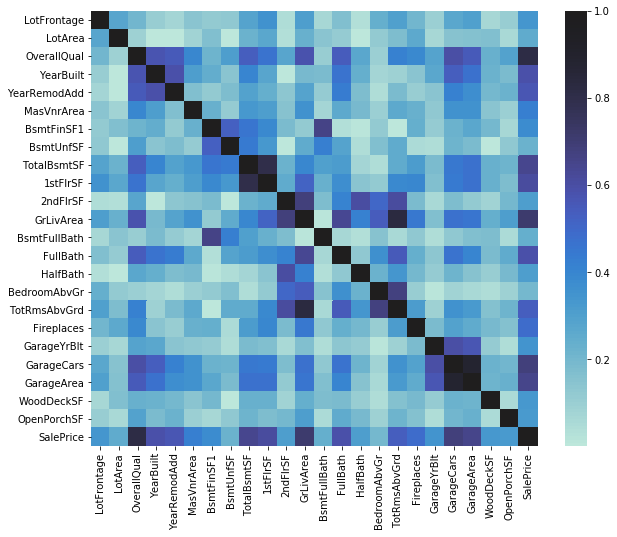

In [139]:
# 得到皮尔逊相关矩阵
corrmat = train.corr('pearson')

plt.figure(figsize=(10,8))

# 绘制热力图
sns.heatmap(np.fabs(corrmat), square=False, center=1)            # 此处取了绝对值

plt.xticks = corrmat.index
plt.yticks = corrmat.columns

plt.show()

接下来我们查看一下保留了哪些变量

In [140]:
for each in factor:
    print(each)

MSSubClass
MSZoning
LotShape
LandContour
LotConfig
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
Heating
HeatingQC
CentralAir
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
SaleType
SaleCondition


类别型变量

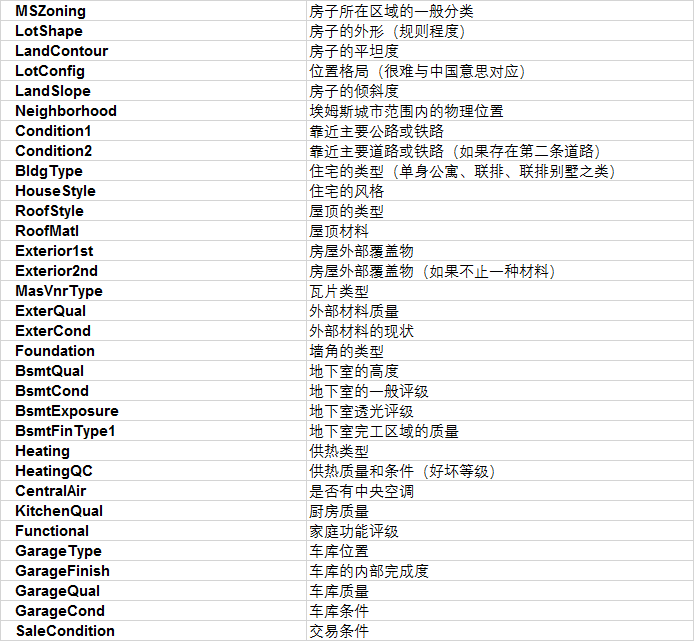

In [141]:
for each in numeric:
    print(each)

LotFrontage
LotArea
OverallQual
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
BsmtFullBath
FullBath
HalfBath
BedroomAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
SalePrice


数值型变量

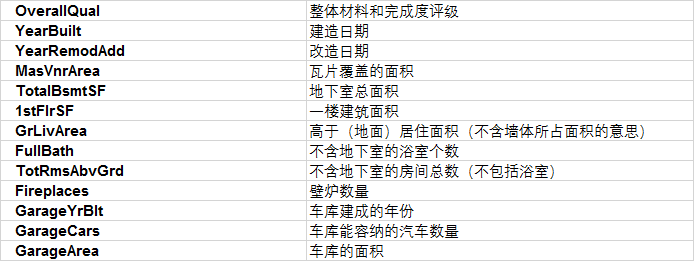

### 建立模型

使用原始数据，建立基础模型，查看模型效果。

In [142]:
# 随机森林

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
  

In [143]:
n_train = train.shape[0]
n_test = test.shape[0]

target = train['SalePrice']

all_data = pd.concat((train, test))
all_data.reset_index(drop=True, inplace=True)

# 删除目标变量
all_data.drop('SalePrice', axis=1, inplace=True)


In [144]:
all_data.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFullBath,BsmtQual,...,OverallQual,RoofMatl,RoofStyle,SaleCondition,SaleType,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,856,854,3,1Fam,TA,No,706.0,GLQ,1.0,Gd,...,7,CompShg,Gable,Normal,WD,8,856.0,0,2003,2003
1,1262,0,3,1Fam,TA,Gd,978.0,ALQ,0.0,Gd,...,6,CompShg,Gable,Normal,WD,6,1262.0,298,1976,1976
2,920,866,3,1Fam,TA,Mn,486.0,GLQ,1.0,Gd,...,7,CompShg,Gable,Normal,WD,6,920.0,0,2001,2002
3,961,756,3,1Fam,Gd,No,216.0,ALQ,1.0,TA,...,7,CompShg,Gable,Abnorml,WD,7,756.0,0,1915,1970
4,1145,1053,4,1Fam,TA,Av,655.0,GLQ,1.0,Gd,...,8,CompShg,Gable,Normal,WD,9,1145.0,192,2000,2000


In [145]:
# 添加一个新的变量

all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [146]:
all_data.skew().sort_values(ascending=False)

LotArea         13.130516
MasVnrArea       2.602036
OpenPorchSF      2.530548
WoodDeckSF       1.849236
1stFlrSF         1.253657
LotFrontage      1.205661
GrLivArea        0.978364
BsmtFinSF1       0.974640
TotalSF          0.936655
BsmtUnfSF        0.920609
2ndFlrSF         0.843671
TotRmsAbvGrd     0.749965
Fireplaces       0.726331
HalfBath         0.699130
TotalBsmtSF      0.662998
BsmtFullBath     0.623140
BedroomAbvGr     0.328298
GarageArea       0.217860
OverallQual      0.181995
FullBath         0.160000
GarageCars      -0.219515
YearRemodAdd    -0.449345
YearBuilt       -0.598395
GarageYrBlt     -3.905056
dtype: float64

In [147]:
skewness = pd.DataFrame({'skew': all_data.skew().sort_values(ascending=False)})

In [148]:
skewness = skewness[abs(skewness) > 0.75]

In [149]:
from scipy.special import boxcox1p

skewed_features = skewness.index
lam = 0.15
# a = pd.DataFrame()
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

In [150]:
# a.skew().sort_values(ascending=False)

### 模型优化

#### 特征转换

对离散型使用 OneHot-Encode，对顺序型将其映射为 1、2、3...。然后再组合所有的数据作为训练集进行模型训练；然后调整模型的参数，同样使用随即森林。

In [151]:
# 顺序型变量的映射关系

map_ship = {'LotShape': {'Reg': 4,'IR1': 3,'IR2': 2, 'IR3': 1, 'NA': 0},    # 规则程度依次下降
            'LandContour': {'Lvl': 4, 'Bnk': 3, 'HLS': 2, 'Low': 1, 'NA': 0},    # 平坦程度
            'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, # 外部材料质量
            'ExterCond' : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, # 外部材料的现状
            'BsmtQual' : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, # 地下室的高度
            'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}, # 地下室的一般评级
            'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},    # 地下室透光评级
            'BsmtFinType1' : {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
            'HeatingQC' : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
            'CentralAir' : {'Y': 2, 'N': 1, 'NA': 0},
            'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
            'GarageFinish' : {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0},
            'GarageQual' : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
            'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
            }
# 映射转换
all_data_copy = all_data.copy()

for each in map_ship.keys():
    all_data_copy[each] = all_data_copy[each].map(map_ship[each])

# 做这一步和不做这一步 要有个对照，看哪个效果好

In [152]:
# one-hot encoder

all_data_copy = pd.get_dummies(all_data_copy)  # 用这个比用one-hot好

In [153]:
print(all_data_copy.shape)   # 独热编码之后的离散变量数据维度

(2915, 229)


In [154]:
train_x = all_data_copy.iloc[:n_train, ]
train_y = target

train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.3, random_state=0)

In [156]:
# 基础模型

base_model = RandomForestRegressor(1000)
base_model.fit(train_x, train_y)

pre_test = base_model.predict(test_x)

# 以R方指标评估模型，分数越高越好。
from sklearn.metrics import r2_score

score = r2_score(test_y, pre_test)
error = np.sqrt(mean_squared_error(test_y, pre_test))
print('R^2 : {}'.format(score))    # 越大越好
print('RMSE : {}'.format(error))    # 越小越好，这个值是比赛中的模型评估标准

R^2 : 0.8953625670365728
RMSE : 0.12792568333347965


### 集成模型优化

In [157]:
# 建模1 XGboost

import xgboost as xgb

base_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.1, gamma=0.01, min_child_weight=0.2)
base_model.fit(train_x, train_y)

pre_test = base_model.predict(test_x)

# 以R方指标评估模型，分数越高越好。
from sklearn.metrics import r2_score

score = r2_score(test_y, pre_test)
error = np.sqrt(mean_squared_error(test_y, pre_test))
print('R^2 : {}'.format(score))    
print('RMSE : {}'.format(error))  

R^2 : 0.914618414787407
RMSE : 0.11555701477051604


In [158]:
# 建模2 梯度提升回归 Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

base_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01)
base_model.fit(train_x, train_y)

pre_test = base_model.predict(test_x)

# 以R方指标评估模型，分数越高越好。
from sklearn.metrics import r2_score

score = r2_score(test_y, pre_test)
error = np.sqrt(mean_squared_error(test_y, pre_test))
print('R^2 : {}'.format(score))    
print('RMSE : {}'.format(error))  

R^2 : 0.9136640718391693
RMSE : 0.11620103285001175


In [162]:
# 建模3 lightGBM

import lightgbm as lgb

base_model = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=1000)
base_model.fit(train_x, train_y)

pre_test = base_model.predict(test_x)

# 以R方指标评估模型，分数越高越好。
from sklearn.metrics import r2_score

score = r2_score(test_y, pre_test)
error = np.sqrt(mean_squared_error(test_y, pre_test))
print('R^2 : {}'.format(score))    
print('RMSE : {}'.format(error))  

R^2 : 0.9076827192108238
RMSE : 0.12015883502277688


In [161]:
# 建模4 bagging
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

base_model = BaggingRegressor(base_estimator=RandomForestRegressor(1000), n_estimators=1000)
base_model.fit(train_x, train_y)

pre_test = base_model.predict(test_x)

# 以R方指标评估模型，分数越高越好。
from sklearn.metrics import r2_score

score = r2_score(test_y, pre_test)
error = np.sqrt(mean_squared_error(test_y, pre_test))
print('R^2 : {}'.format(score))    
print('RMSE : {}'.format(error))  

R^2 : 0.8982695652350483
RMSE : 0.1261361750774546


In [ ]:
# python stacking 实现



In [ ]:
# 调参

from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 300, 500, 1000, 2000],
          'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.3],
          'min_child_weight': [0.1, 0.2, 0.5, 0.8, 1.0],
          'max_depth': [3, 5, 6, 8, 10],
          'gamma': [0, 0.01, 0.05, 0.1, 1.0]}

base_model = XGBRegressor()
grid_search = GridSearchCV(base_model, param_grid=params)

grid_search.fit(train_x, train_y)

pre_test = grid_search.predict(test_x)

# 以R方指标评估模型，分数越高越好。
from sklearn.metrics import r2_score

score = r2_score(test_y, pre_test)
error = np.sqrt(mean_squared_error(test_y, pre_test))
print('R^2 : {}'.format(score))    
print('RMSE : {}'.format(error)) 

In [142]:
# 预测测试数据并保存结果

test = all_data_copy.iloc[n_train:, ]

pre = base_model.predict(test)

pre_true = np.exp(pre) + 1

sub = pd.DataFrame({'Id': test_id.values, 'SalePrice':pre_true})

sub.to_csv('../input/submission.csv', index=False)